# Clustering et cartographie sur les communes de Mayotte

> Ce travail est en complément de celui sur le DataMart de Mayotte.

## Préparation des données

A fin d'utilisation et de compréhension, les noms des colonnes ont été modifiés directement dans le fichier excel `DataMart.xlsx`. 

Les variables pour identifier les communes et les villages sont :  
`commune` : Le nom de la commune avec son code commune entre parenthèse  
`Code_commune` : Le numéro de commune  
`Village_de_residence` : Le nom du village  
`Code_village` : Un code comprenant le numéro de la région, le code commune et l'identifiant du village

Ensuite, nous avons divers indicateurs sur l'emploi ou encore les logements. Ces indicateurs comprennent soit une commune donc tous les villages qui font partie de la commune soit plus particulièrement un village.  
Chaque indicateur comprend son nombre (avec le préfixe "Nb") et son pourcentage (avec le préfixe "Pc").  

Par la suite, nous regrouperons les villages et leurs indicateurs pour pouvoir faire nos manipulations que sur les communes.

In [2]:
import pandas as pd

In [3]:
df_Mayotte = pd.read_excel("DataMart.xlsx")
df_Mayotte

,Commune,Code_commune,Village_de_residence,Code_village,Nb_enfants_ARS,Nb_15plus_sans_diplome,Pc_15plus_sans_diplome,Nb_15_34_sans_diplome,Pc_15_34_sans_diplome,Nb_allocataire_aide_logement,...,Nb_sans_bac_ordure,Pc_sans_bac_ordure,Nb_avec_internet,Pc_avec_internet,Nb_sans_internet,Pc_sans_internet,Nb_absence_confort_sanitaire_de_base,Pc_absence_confort_sanitaire_de_base,Nb_presence_confort_sanitaire_de_base,Pc_presence_confort_sanitaire_de_base
0,Acoua (601),601,Acoua,97601001,883,1501.43,0.500922,363.19,0.270589,31,...,554.5840,59.825674,286.9330,30.952859,640.067,69.047141,433.783,46.794283,493.217,53.205717
1,Acoua (601),601,Mtsangadoua,97601002,883,1501.43,0.500922,363.19,0.270589,31,...,182.1390,47.555875,104.8220,27.368668,278.178,72.631332,155.066,40.487206,227.934,59.512794
2,Bandraboua (602),602,Bandraboua,97602001,1680,4684.90,0.620997,2133.97,0.496832,270,...,166.0140,25.002108,201.8410,30.397741,462.159,69.602259,315.049,47.447139,348.951,52.552861
3,Bandraboua (602),602,Handréma,97602002,1680,4684.90,0.620997,2133.97,0.496832,270,...,127.0000,31.909548,112.0000,28.140704,286.000,71.859296,171.000,42.964824,227.000,57.035176
4,Bandraboua (602),602,Mtsangamboua,97602003,1680,4684.90,0.620997,2133.97,0.496832,270,...,93.7945,31.474664,80.2537,26.930772,217.746,73.069128,110.245,36.994966,187.755,63.005034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Sada (616),616,Mangajou,97616002,1040,3271.76,0.496549,1227.32,0.379849,181,...,323.0050,83.463824,83.9997,21.705349,303.000,78.294574,182.042,47.039276,204.958,52.960724
68,Tsingoni (617),617,Tsingoni,97617001,1114,4248.77,0.538036,1864.08,0.413177,220,...,578.0590,69.063202,325.2410,38.857945,511.759,61.142055,335.133,40.039785,501.867,59.960215
69,Tsingoni (617),617,Mroalé,97617002,1114,4248.77,0.538036,1864.08,0.413177,220,...,94.0077,41.781200,78.9815,35.102889,146.019,64.897333,124.998,55.554667,100.002,44.445333
70,Tsingoni (617),617,Combani,97617003,1114,4248.77,0.538036,1864.08,0.413177,220,...,1043.5700,65.965234,408.1660,25.800632,1173.830,74.199115,1093.500,69.121365,488.504,30.878887


Certaines colonnes comprennent des valeurs **inférieures à 5**, indiqué avec `<5`. On va donc devoir les remplacer avec une valeur numérique pour pouvoir les utiliser.  
J'ai choisi de prendre la moyenne arrondi au supérieur, c'est à dire **3**.

In [4]:
df_Mayotte["Nb_demandeurs_actif"] = df_Mayotte["Nb_demandeurs_actif"].replace(to_replace="<5", value=3).infer_objects(copy=False)
df_Mayotte["Nb_demandeur_emploi_moins25_AB"] = df_Mayotte["Nb_demandeur_emploi_moins25_AB"].replace(to_replace="<5", value=3).infer_objects(copy=False)
df_Mayotte["Nb_demandeur_emploi_50plus_AB"] = df_Mayotte["Nb_demandeur_emploi_50plus_AB"].replace(to_replace="<5", value=3).infer_objects(copy=False)
df_Mayotte["Nb_demandeur_emploi_homme_moins25_AB"] = df_Mayotte["Nb_demandeur_emploi_homme_moins25_AB"].replace(to_replace="<5", value=3).infer_objects(copy=False)
df_Mayotte["Nb_demandeur_emploi_homme_25_49_AB"] = df_Mayotte["Nb_demandeur_emploi_homme_25_49_AB"].replace(to_replace="<5", value=3).infer_objects(copy=False)
df_Mayotte["Nb_demandeur_emploi_homme_50plus_AB"] = df_Mayotte["Nb_demandeur_emploi_homme_50plus_AB"].replace(to_replace="<5", value=3).infer_objects(copy=False)
df_Mayotte["Nb_demandeur_emploi_femme_50plus_AB"] = df_Mayotte["Nb_demandeur_emploi_femme_50plus_AB"].replace(to_replace="<5", value=3).infer_objects(copy=False)
df_Mayotte

/var/folders/1s/8s83d2j16wjf3y376md3n_v00000gn/T/ipykernel_22878/471773289.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Mayotte["Nb_demandeurs_actif"] = df_Mayotte["Nb_demandeurs_actif"].replace(to_replace="<5", value=3).infer_objects(copy=False)
/var/folders/1s/8s83d2j16wjf3y376md3n_v00000gn/T/ipykernel_22878/471773289.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Mayotte["Nb_demandeur_emploi_moins25_AB"] = df_Mayotte["Nb_demandeur_emploi_moins25_AB"].replace(to_replace="<5", value=3).infer_objects(copy=False)


,Commune,Code_commune,Village_de_residence,Code_village,Nb_enfants_ARS,Nb_15plus_sans_diplome,Pc_15plus_sans_diplome,Nb_15_34_sans_diplome,Pc_15_34_sans_diplome,Nb_allocataire_aide_logement,...,Nb_sans_bac_ordure,Pc_sans_bac_ordure,Nb_avec_internet,Pc_avec_internet,Nb_sans_internet,Pc_sans_internet,Nb_absence_confort_sanitaire_de_base,Pc_absence_confort_sanitaire_de_base,Nb_presence_confort_sanitaire_de_base,Pc_presence_confort_sanitaire_de_base
0,Acoua (601),601,Acoua,97601001,883,1501.43,0.500922,363.19,0.270589,31,...,554.5840,59.825674,286.9330,30.952859,640.067,69.047141,433.783,46.794283,493.217,53.205717
1,Acoua (601),601,Mtsangadoua,97601002,883,1501.43,0.500922,363.19,0.270589,31,...,182.1390,47.555875,104.8220,27.368668,278.178,72.631332,155.066,40.487206,227.934,59.512794
2,Bandraboua (602),602,Bandraboua,97602001,1680,4684.90,0.620997,2133.97,0.496832,270,...,166.0140,25.002108,201.8410,30.397741,462.159,69.602259,315.049,47.447139,348.951,52.552861
3,Bandraboua (602),602,Handréma,97602002,1680,4684.90,0.620997,2133.97,0.496832,270,...,127.0000,31.909548,112.0000,28.140704,286.000,71.859296,171.000,42.964824,227.000,57.035176
4,Bandraboua (602),602,Mtsangamboua,97602003,1680,4684.90,0.620997,2133.97,0.496832,270,...,93.7945,31.474664,80.2537,26.930772,217.746,73.069128,110.245,36.994966,187.755,63.005034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Sada (616),616,Mangajou,97616002,1040,3271.76,0.496549,1227.32,0.379849,181,...,323.0050,83.463824,83.9997,21.705349,303.000,78.294574,182.042,47.039276,204.958,52.960724
68,Tsingoni (617),617,Tsingoni,97617001,1114,4248.77,0.538036,1864.08,0.413177,220,...,578.0590,69.063202,325.2410,38.857945,511.759,61.142055,335.133,40.039785,501.867,59.960215
69,Tsingoni (617),617,Mroalé,97617002,1114,4248.77,0.538036,1864.08,0.413177,220,...,94.0077,41.781200,78.9815,35.102889,146.019,64.897333,124.998,55.554667,100.002,44.445333
70,Tsingoni (617),617,Combani,97617003,1114,4248.77,0.538036,1864.08,0.413177,220,...,1043.5700,65.965234,408.1660,25.800632,1173.830,74.199115,1093.500,69.121365,488.504,30.878887


### Création du dataframe regroupant les communes de Mayotte

Pour créer ce dataframe, on doit faire la moyenne des indicateurs villages pour pouvoir les regrouper par communes.

In [5]:
df_village_Mayotte = df_Mayotte

group_cols = ["Commune","Code_commune"]
metric_cols = ["Nb_residence_principale","Pc_residence_principale","Nb_logement_occasionnel","Pc_logement_occasionnel","Nb_residence_secondaire","Pc_residence_secondaire","Nb_logement_vacant","Pc_logement_vacant","Nb_sol_terre_battue","Pc_sol_terre_battue","Nb_sol_beton","Pc_sol_beton","Nb_sol_autre","Pc_sol_autre","Nb_personne_logement","Nb_logement_accessible_voie_carossable","Pc_logement_accessible_voie_carossable","Nb_logement_inaccessible_voie_carossable","Pc_logement_inaccessible_voie_carossable","Nb_interieur_eaufroide","Pc_interieur_eaufroise","Nb_interieur_eaufroide_et_chaude","Pc_interieur_eaufroide_et_chaude","Nb_cour_exterieur","Pc_cour_exterieur","Nb_exterieur_chez_parent","Pc_exterieur_chez_parent","Nb_exterieur_chez_tiers","Pc_exterieur_chez_tiers","Nb_exterieur_fontaine","Pc_exterieur_fontaine","Nb_exterieur_autre","Pc_exterieur_autre","Nb_electricite_compteur_indiv","Pc_electricite_compteur_indiv","Nb_electricite_sans_compteur_indiv","Pc_electricite_sans_compteur_indiv","Nb_sans_electricite","Pc_sans_electricite","Nb_bac_ordure","Pc_bac_ordure","Nb_sans_bac_ordure","Pc_sans_bac_ordure","Nb_avec_internet","Pc_avec_internet","Nb_sans_internet","Pc_sans_internet","Nb_absence_confort_sanitaire_de_base","Pc_absence_confort_sanitaire_de_base","Nb_presence_confort_sanitaire_de_base"]

aggs = df_Mayotte.groupby(group_cols)[metric_cols].mean()
df_Mayotte.drop(metric_cols, axis=1, inplace=True) 
df_Mayotte.drop_duplicates(subset=group_cols, keep='last', inplace=True)
df_commune_Mayotte = df_Mayotte.merge(right=aggs, right_index=True, left_on=group_cols, how='right')
df_commune_Mayotte.drop(["Village_de_residence","Code_village"], axis=1)

df_commune_Mayotte

,Commune,Code_commune,Village_de_residence,Code_village,Nb_enfants_ARS,Nb_15plus_sans_diplome,Pc_15plus_sans_diplome,Nb_15_34_sans_diplome,Pc_15_34_sans_diplome,Nb_allocataire_aide_logement,...,Pc_bac_ordure,Nb_sans_bac_ordure,Pc_sans_bac_ordure,Nb_avec_internet,Pc_avec_internet,Nb_sans_internet,Pc_sans_internet,Nb_absence_confort_sanitaire_de_base,Pc_absence_confort_sanitaire_de_base,Nb_presence_confort_sanitaire_de_base
1,Acoua (601),601,Mtsangadoua,97601002,883,1501.43,0.500922,363.19,0.270589,31,...,46.309226,368.361500,53.690774,195.877500,29.160764,459.122500,70.839236,294.424500,43.640744,360.575500
6,Bandraboua (602),602,Bouyouni,97602005,1680,4684.90,0.620997,2133.97,0.496832,270,...,55.050534,330.599300,44.949500,122.602140,21.211910,515.197800,78.788070,395.910600,54.377194,241.890200
12,Bandrele (603),603,Dapani,97603006,1160,3309.40,0.582980,1354.57,0.455632,86,...,40.414229,245.499533,59.585792,120.802052,21.005653,320.198000,78.994345,264.314667,68.737049,176.685217
19,Bouéni (604),604,Majiméouni,97604007,980,1601.89,0.431523,349.17,0.213566,169,...,56.794059,130.865654,43.205927,87.406743,34.972816,150.878943,65.027167,82.806646,34.564474,155.479014
21,Chiconi (605),605,Sohoa,97605002,1434,2459.21,0.501612,705.43,0.297477,89,...,20.887621,831.036000,79.112350,336.296500,28.661882,751.703500,71.338118,527.038500,49.275869,560.961500
27,Chirongui (606),606,Mréréni,97606006,1166,2691.41,0.525033,966.43,0.369966,186,...,61.713074,136.293667,38.286905,118.001833,30.063948,247.498167,69.936038,190.380667,55.079508,175.119317
32,Dembeni (607),607,Tsararano,97607005,1191,5181.79,0.613608,2444.42,0.496596,76,...,24.621477,556.784200,75.378523,140.847220,18.385708,593.152800,81.614297,537.195800,74.712647,196.804160
34,Dzaoudzi (608),608,Labattoir,97608002,2106,5101.63,0.492877,1810.39,0.342807,290,...,38.684632,1281.100000,61.315368,699.040000,56.021276,1415.960000,43.978724,1309.460000,31.170198,805.540000
40,Kani-Kéli (609),609,Mbouini,97609006,799,1593.77,0.468942,417.74,0.262748,65,...,60.017513,93.733450,39.982487,88.577550,31.932170,158.422467,68.067838,82.854683,36.130001,164.145283
46,Koungou (610),610,Majicavo-Lamir,97610006,2520,9477.51,0.554868,4476.14,0.444809,340,...,16.932688,1075.941667,83.067319,275.212833,27.944765,974.620167,72.055220,904.816500,66.088763,345.017167


Les pourcentages des indicateurs communes sont entre **0** et **1**. Alors que les indicateurs villages sont entre **0** et **100**.

Afin d'avoir les mêmes formats, on va devoir multiplier par 100 les pourcentages des indicateurs communes.

In [6]:
# Correction de la colonne commune pour pouvoir le joindre avec la shapefile de Mayotte
df_commune_Mayotte["Commune"] = df_commune_Mayotte["Commune"].str.split(pat=' ').str[0]
df_commune_Mayotte = df_commune_Mayotte.rename(columns={"Commune": "commune"})

# Mise à niveau des pourcentages communes
df_commune_Mayotte["Pc_15plus_sans_diplome"] = df_commune_Mayotte["Pc_15plus_sans_diplome"] * 100
df_commune_Mayotte["Pc_15_34_sans_diplome"] = df_commune_Mayotte["Pc_15_34_sans_diplome"] * 100
df_commune_Mayotte["Pc_allocataire_aide_logement_100menages"] = df_commune_Mayotte["Pc_allocataire_aide_logement_100menages"] * 100
df_commune_Mayotte["Pc_logement_sociaux_100habitations"] = df_commune_Mayotte["Pc_logement_sociaux_100habitations"] * 100
df_commune_Mayotte["Pc_allocataire_RSA"] = df_commune_Mayotte["Pc_allocataire_RSA"] * 100
df_commune_Mayotte["Pc_personnes_couvertes_RSA"] = df_commune_Mayotte["Pc_personnes_couvertes_RSA"] * 100
df_commune_Mayotte["Pc_allocataire_AAH"] = df_commune_Mayotte["Pc_allocataire_AAH"] * 100
df_commune_Mayotte["Pc_enfants_AEEH"] = df_commune_Mayotte["Pc_enfants_AEEH"] * 100

df_commune_Mayotte

,commune,Code_commune,Village_de_residence,Code_village,Nb_enfants_ARS,Nb_15plus_sans_diplome,Pc_15plus_sans_diplome,Nb_15_34_sans_diplome,Pc_15_34_sans_diplome,Nb_allocataire_aide_logement,...,Pc_bac_ordure,Nb_sans_bac_ordure,Pc_sans_bac_ordure,Nb_avec_internet,Pc_avec_internet,Nb_sans_internet,Pc_sans_internet,Nb_absence_confort_sanitaire_de_base,Pc_absence_confort_sanitaire_de_base,Nb_presence_confort_sanitaire_de_base
1,Acoua,601,Mtsangadoua,97601002,883,1501.43,50.092249,363.19,27.058902,31,...,46.309226,368.361500,53.690774,195.877500,29.160764,459.122500,70.839236,294.424500,43.640744,360.575500
6,Bandraboua,602,Bouyouni,97602005,1680,4684.90,62.099690,2133.97,49.683247,270,...,55.050534,330.599300,44.949500,122.602140,21.211910,515.197800,78.788070,395.910600,54.377194,241.890200
12,Bandrele,603,Dapani,97603006,1160,3309.40,58.297955,1354.57,45.563161,86,...,40.414229,245.499533,59.585792,120.802052,21.005653,320.198000,78.994345,264.314667,68.737049,176.685217
19,Bouéni,604,Majiméouni,97604007,980,1601.89,43.152272,349.17,21.356616,169,...,56.794059,130.865654,43.205927,87.406743,34.972816,150.878943,65.027167,82.806646,34.564474,155.479014
21,Chiconi,605,Sohoa,97605002,1434,2459.21,50.161241,705.43,29.747657,89,...,20.887621,831.036000,79.112350,336.296500,28.661882,751.703500,71.338118,527.038500,49.275869,560.961500
27,Chirongui,606,Mréréni,97606006,1166,2691.41,52.503331,966.43,36.996643,186,...,61.713074,136.293667,38.286905,118.001833,30.063948,247.498167,69.936038,190.380667,55.079508,175.119317
32,Dembeni,607,Tsararano,97607005,1191,5181.79,61.360792,2444.42,49.659614,76,...,24.621477,556.784200,75.378523,140.847220,18.385708,593.152800,81.614297,537.195800,74.712647,196.804160
34,Dzaoudzi,608,Labattoir,97608002,2106,5101.63,49.287730,1810.39,34.280742,290,...,38.684632,1281.100000,61.315368,699.040000,56.021276,1415.960000,43.978724,1309.460000,31.170198,805.540000
40,Kani-Kéli,609,Mbouini,97609006,799,1593.77,46.894208,417.74,26.274774,65,...,60.017513,93.733450,39.982487,88.577550,31.932170,158.422467,68.067838,82.854683,36.130001,164.145283
46,Koungou,610,Majicavo-Lamir,97610006,2520,9477.51,55.486790,4476.14,44.480903,340,...,16.932688,1075.941667,83.067319,275.212833,27.944765,974.620167,72.055220,904.816500,66.088763,345.017167


## CAH et clustering

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

### Corrélation entre les communes

Afin de pouvoir faire la corrélation entre les variables, il faut retirer toutes les variables qualitatives dans notre jeu de données.

In [8]:
ACP_Mayotte_Commune = df_commune_Mayotte.drop(["commune","Code_commune","Village_de_residence","Code_village"], axis=1)
print(ACP_Mayotte_Commune)

    Nb_enfants_ARS   Nb_15plus_sans_diplome  Pc_15plus_sans_diplome  \
1               883                 1501.43               50.092249   
6              1680                 4684.90               62.099690   
12             1160                 3309.40               58.297955   
19              980                 1601.89               43.152272   
21             1434                 2459.21               50.161241   
27             1166                 2691.41               52.503331   
32             1191                 5181.79               61.360792   
34             2106                 5101.63               49.287730   
40              799                 1593.77               46.894208   
46             2520                 9477.51               55.486790   
60              834                 2161.68               56.524115   
54             5581                20582.04               51.778287   
57             1466                 2146.60               47.934866   
64    

Avant d'ajuster les données avec la fonction `fit()` de *sklearn*, on va les normaliser.

In [9]:
scale_mayotte = scale(ACP_Mayotte_Commune)
scale_mayotte

array([[-5.65137916e-01, -6.74304511e-01, -4.42273108e-01, ...,
        -6.17239310e-01, -6.20169476e-01, -2.31798231e-01],
       [ 1.49606192e-01,  4.28831071e-02,  1.72349387e+00, ...,
        -3.79938133e-01,  2.15403422e-01, -5.69906013e-01],
       [-3.16726225e-01, -2.66996228e-01,  1.03777966e+00, ...,
        -6.87644015e-01,  1.33297089e+00, -7.55660376e-01],
       ...,
       [-4.85323330e-01, -3.15443739e-01, -1.48311242e+00, ...,
         2.02435585e+00, -1.95945001e-01,  2.94821728e+00],
       [-4.24341398e-01, -2.75475951e-01, -5.21160875e-01, ...,
         7.13989735e-02, -6.62304154e-01,  1.23672705e+00],
       [-3.57978708e-01, -5.53703823e-02,  2.27143015e-01, ...,
        -1.56067295e-03,  8.23187709e-01, -3.90774151e-01]])

In [10]:
pca = PCA()
pca.fit(scale_mayotte)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[3.80681999e+01 1.72393017e+01 1.01728101e+01 3.90466666e+00
 3.70749041e+00 2.89840512e+00 2.32638218e+00 1.85299127e+00
 1.61772026e+00 1.11292560e+00 9.48736944e-01 7.64873472e-01
 5.11504086e-01 3.98223051e-01 3.51932415e-01 1.86336785e-01
 4.06073745e-31]
[4.42332025e-01 2.00311422e-01 1.18202587e-01 4.53701282e-02
 4.30790462e-02 3.36779099e-02 2.70313108e-02 2.15307628e-02
 1.87970400e-02 1.29315974e-02 1.10238134e-02 8.88741870e-03
 5.94340260e-03 4.62713785e-03 4.08926553e-03 2.16513331e-03
 4.71835869e-33]


Maintenant, on peut afficher les 17 dimensions représentant les communes avec leurs pourcentage de variances.

In [11]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(len(pca.explained_variance_))], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,3.806820e+01,44.0,44.0
1,Dim2,1.723930e+01,20.0,64.0
2,Dim3,1.017281e+01,12.0,76.0
3,Dim4,3.904667e+00,5.0,81.0
4,Dim5,3.707490e+00,4.0,85.0
5,Dim6,2.898405e+00,3.0,88.0
6,Dim7,2.326382e+00,3.0,91.0
7,Dim8,1.852991e+00,2.0,93.0
8,Dim9,1.617720e+00,2.0,95.0
9,Dim10,1.112926e+00,1.0,96.0


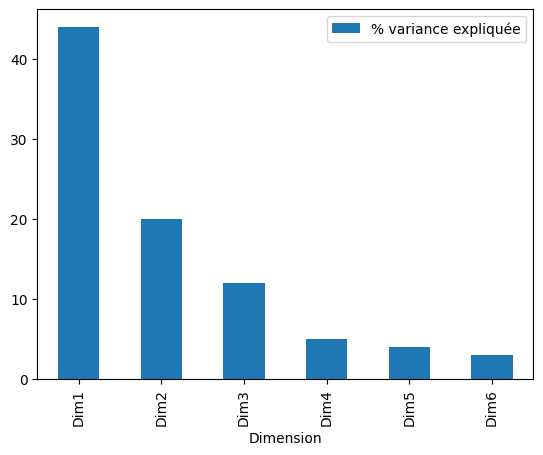

In [12]:
eig = eig.head(6) # Pour afficher que les 6 premières dimensions
eig.plot.bar(x = "Dimension", y = "% variance expliquée")
plt.show()

On remarque que les deux premières dimensions sont supérieurs ou égales à 20%.

### Corrélation entre les variables

Afin de voir les corrélations entre les variables, nous allons réaliser un cercle des corrélations.

In [13]:
ACP_Mayotte_Commune_tr = pca.transform(scale_mayotte)
ACP_Mayotte_Commune_tr

array([[-4.10833766e+00,  2.24800583e+00, -1.10439069e+00,
        -1.52348913e+00, -6.01239796e-01, -1.63771595e-01,
        -2.19266178e+00,  7.05024269e-01, -9.84930548e-01,
        -8.39858351e-01,  1.27346766e-01, -1.61744546e+00,
        -6.58162246e-02,  5.31159833e-01, -9.05108811e-01,
        -8.01873262e-01,  1.28099707e-15],
       [-1.41410922e+00, -4.06839263e+00,  1.25676795e-01,
        -4.18045409e-01,  1.73658003e+00,  2.80706751e+00,
         3.05607594e+00,  3.00793856e-02,  1.28799737e+00,
        -1.50834836e+00, -2.90303991e-01, -1.32817078e-01,
        -2.53288366e-02,  8.70440706e-01,  3.80784990e-01,
        -4.21886673e-01,  3.52117244e-16],
       [-3.29376613e+00, -4.03388003e+00,  2.16155612e-01,
        -3.09593091e-01, -7.90125684e-01,  8.80473422e-01,
         4.79841058e-01, -8.25356782e-01, -5.12782778e-01,
         2.19555672e+00, -1.35928508e+00, -3.66167494e-01,
        -1.77656061e+00, -3.14297090e-02, -1.92562510e-01,
         2.53673167e-02,  9.7

In [14]:
df_acp_Mayotte_commune_tr = pd.DataFrame({
    "Dim1" : ACP_Mayotte_Commune_tr[:,0], 
    "Dim2" : ACP_Mayotte_Commune_tr[:,1],
    "commune" : df_commune_Mayotte["commune"],
    "Code_commune" : df_commune_Mayotte["Code_commune"]
})
df_acp_Mayotte_commune_tr

,Dim1,Dim2,commune,Code_commune
1,-4.108338,2.248006,Acoua,601
6,-1.414109,-4.068393,Bandraboua,602
12,-3.293766,-4.033880,Bandrele,603
19,-5.181840,1.969928,Bouéni,604
21,-1.676969,2.644865,Chiconi,605
27,-4.266743,-1.139875,Chirongui,606
32,-0.067960,-5.968907,Dembeni,607
34,6.045857,6.651901,Dzaoudzi,608
40,-5.920133,1.340610,Kani-Kéli,609
46,4.942790,-4.368006,Koungou,610


In [15]:
n = scale_mayotte.shape[0] # nb individus
p = scale_mayotte.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(pca.n_components_):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'variable': ACP_Mayotte_Commune.columns,'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

,variable,COR_1,COR_2
0,Nb_enfants_ARS,0.877321,-0.147665
1,Nb_15plus_sans_diplome,0.904146,-0.298028
2,Pc_15plus_sans_diplome,-0.020022,-0.822276
3,Nb_15_34_sans_diplome,0.883901,-0.380351
4,Pc_15_34_sans_diplome,0.242572,-0.765567
...,...,...,...
76,Nb_sans_internet,0.883367,0.340367
77,Pc_sans_internet,-0.257478,-0.805223
78,Nb_absence_confort_sanitaire_de_base,0.896973,0.273719
79,Pc_absence_confort_sanitaire_de_base,0.279015,-0.824028


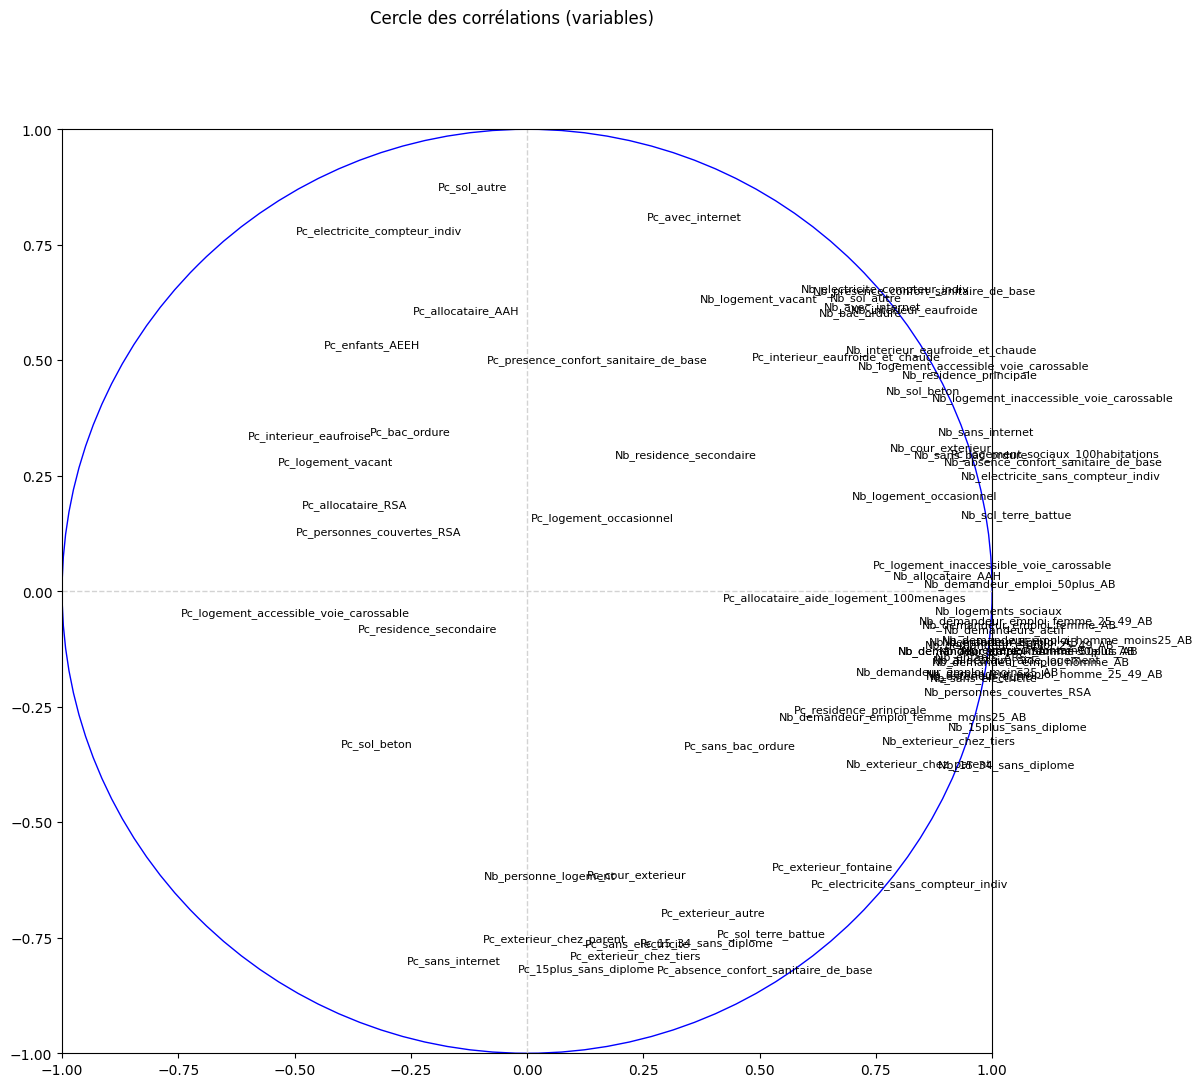

In [16]:

fig, axes = plt.subplots(figsize = (12,12))
fig.suptitle("Cercle des corrélations (variables)")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)

for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["variable"][j], fontsize=8)

plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

### Classification Ascendant Hiérarchique

In [17]:
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hac.fit(scale_mayotte)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [18]:
# C'est un code récupérer sur GitHub (fxjollois.github.io)
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

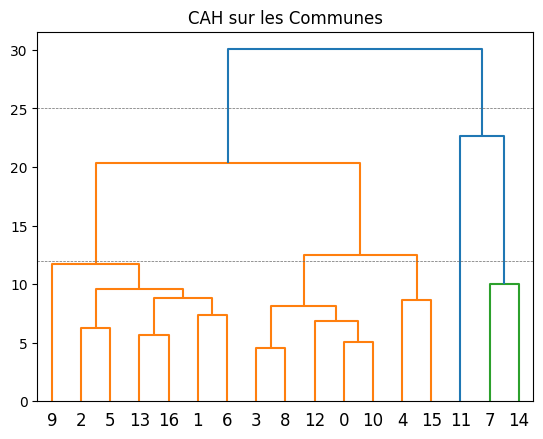

In [19]:
plt.title("CAH sur les Communes")
plot_dendrogram(hac)
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 12, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

En observant ce dendogram, on peut remarque potentiellement 4 classes avec une classe comprenant un seul individu.

### Méthode du coude

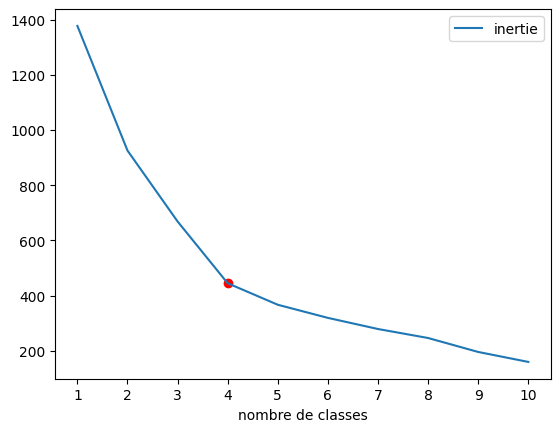

In [20]:
inertie = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(scale_mayotte)
    inertie = inertie + [kmeans.inertia_]
inertie = pd.DataFrame({"k": range(1, 11), "inertie": inertie})
inertie.plot.line(x = "k", y = "inertie")
plt.xticks(range(1, 11))
plt.scatter(4, inertie.query('k == 4')["inertie"], c = "red")
plt.xlabel("nombre de classes")
plt.show()

En effectuant la technique du coude, on peut voir une cassure pour la classe 4.  
On va donc effectuer la méthode Kmeans avec 4 clusters.

### Kmeans

In [49]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(scale_mayotte)
pd.Series(kmeans.labels_).values

array([1, 3, 3, 1, 1, 1, 3, 0, 1, 3, 1, 2, 1, 3, 0, 1, 3], dtype=int32)

In [50]:
kmean_commune = ACP_Mayotte_Commune.assign(classe = kmeans.labels_)
kmean_commune.groupby("classe").mean()

,Nb_enfants_ARS,Nb_15plus_sans_diplome,Pc_15plus_sans_diplome,Nb_15_34_sans_diplome,Pc_15_34_sans_diplome,Nb_allocataire_aide_logement,Pc_allocataire_aide_logement_100menages,Nb_logements_sociaux,Pc_logement_sociaux_100habitations,Nb_demandeurs_actif,...,Pc_bac_ordure,Nb_sans_bac_ordure,Pc_sans_bac_ordure,Nb_avec_internet,Pc_avec_internet,Nb_sans_internet,Pc_sans_internet,Nb_absence_confort_sanitaire_de_base,Pc_absence_confort_sanitaire_de_base,Nb_presence_confort_sanitaire_de_base
classe,,,,,,,,,,,,,,,,,,,,,
0,1539.00,4097.99000,46.804680,1402.170000,32.646321,226.500000,1.837105,25.0,0.842341,24.000000,...,45.564825,1330.335000,54.435175,1002.645000,50.524426,1505.355000,49.475574,1366.805000,40.130945,1141.195000
1,1075.25,2178.46875,49.614645,650.037500,30.312151,99.750000,1.387487,0.0,0.000000,3.250000,...,49.797756,386.797746,50.202225,211.613135,30.445451,442.484810,69.554532,285.475179,42.930883,368.623273
2,5581.00,20582.04000,51.778287,8613.080000,39.180675,1615.000000,2.819434,207.0,1.386377,181.000000,...,40.664850,1346.692000,59.335189,640.557125,28.726012,1593.317875,71.273968,1397.115375,62.760943,836.760750
3,1410.50,5033.59500,58.491378,2275.816667,46.064380,183.166667,1.487900,3.0,0.050000,10.333333,...,32.714553,547.090967,67.285446,168.669733,23.998029,585.185603,76.001962,513.039724,65.148403,240.816161


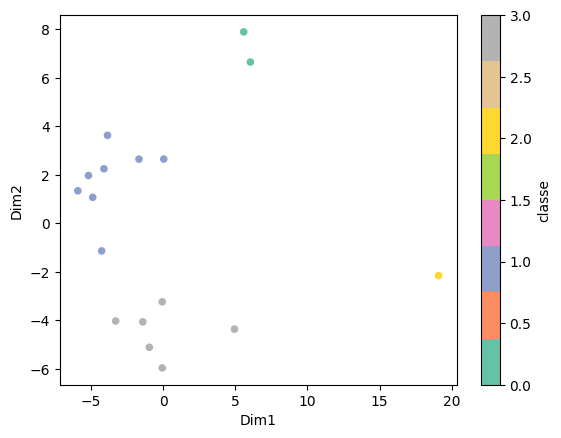

In [51]:
kmean_commune = df_acp_Mayotte_commune_tr.assign(classe = kmeans.labels_)
kmean_commune.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Set2")
plt.show()

On peut voir donc les 4 classes avec une classe comprenant une seule commune. Probablement <u>Mamoudzou</u> qui est la capitale de Mayotte.

## Cartographie

In [24]:
import geopandas as gpd

### Import de la shapefile de Mayotte

In [25]:
sh_Mayotte = gpd.read_file("Shapefile/976_Commune.shp")
sh_Mayotte

,OBJECTID,commune,codegeo,pop2007,pop2012,geometry
0,1,Dzaoudzi,97608,15339,14311,"POLYGON ((531091.533 8589298.724, 531094.279 8..."
1,2,Pamandzi,97615,9077,9892,"POLYGON ((529450.396 8585710.754, 529458.724 8..."
2,3,Acoua,97601,4622,4714,"POLYGON ((505601.014 8595853.99, 506087.033 85..."
3,4,Mamoudzou,97611,53022,57281,"POLYGON ((525633.65 8590176.146, 525641.343 85..."
4,5,Dembéni,97607,10141,10923,"POLYGON ((519451.543 8582814.494, 519758.692 8..."
5,6,Bouéni,97604,5296,6402,"POLYGON ((509309.896 8574165.594, 509335.788 8..."
6,7,Kani-Kéli,97609,4527,4920,"POLYGON ((514564.478 8567648.431, 514862.565 8..."
7,8,Chirongui,97606,6605,8047,"POLYGON ((515732.024 8577176.042, 516720.222 8..."
8,9,Bandrélé,97603,6838,7885,"POLYGON ((522536.247 8574729.38, 522446.508 85..."
9,10,Bandraboua,97602,9013,10132,"MULTIPOLYGON (((513951.02 8593291.042, 513935...."


### Correction des noms des communes avant la jointure

Certaines communes n'ont pas les mêmes noms entre la shapfile et le DataMart. Pour repérer les communes ayant des noms différents, on va utiliser une propriété de l'outer join de la fonction `merge`.

In [26]:
df_commune_Mayotte_diff = pd.merge(df_commune_Mayotte, sh_Mayotte, on="commune", how="outer", indicator=True)
print(df_commune_Mayotte_diff[df_commune_Mayotte_diff["_merge"] == "left_only"]["commune"])
print(df_commune_Mayotte_diff[df_commune_Mayotte_diff["_merge"] == "right_only"]["commune"])

2          Bandrele
7           Dembeni
12    M'tsangamouji
Name: commune, dtype: object
3         Bandrélé
8          Dembéni
15    Mtsangamouji
Name: commune, dtype: object


On remplace donc les noms des communes du dataframe par ceux du shapfile.

In [27]:
df_commune_Mayotte["commune"] = df_commune_Mayotte["commune"].replace(to_replace="Bandrele", value="Bandrélé")
df_commune_Mayotte["commune"] = df_commune_Mayotte["commune"].replace(to_replace="Dembeni", value="Dembéni")
df_commune_Mayotte["commune"] = df_commune_Mayotte["commune"].replace(to_replace="M'tsangamouji", value="Mtsangamouji")

### Jointure du dataframe et du shapefile

In [28]:
df_commune_Mayotte_geo = pd.merge(df_commune_Mayotte, sh_Mayotte, on="commune", how='inner')
df_commune_Mayotte_geo = gpd.GeoDataFrame(df_commune_Mayotte_geo, geometry='geometry', crs=4326)
df_commune_Mayotte_geo

,commune,Code_commune,Village_de_residence,Code_village,Nb_enfants_ARS,Nb_15plus_sans_diplome,Pc_15plus_sans_diplome,Nb_15_34_sans_diplome,Pc_15_34_sans_diplome,Nb_allocataire_aide_logement,...,Nb_sans_internet,Pc_sans_internet,Nb_absence_confort_sanitaire_de_base,Pc_absence_confort_sanitaire_de_base,Nb_presence_confort_sanitaire_de_base,OBJECTID,codegeo,pop2007,pop2012,geometry
0,Acoua,601,Mtsangadoua,97601002,883,1501.43,50.092249,363.19,27.058902,31,...,459.122500,70.839236,294.424500,43.640744,360.575500,3,97601,4622,4714,"POLYGON ((505601.0145 8595853.9899, 506087.032..."
1,Bandraboua,602,Bouyouni,97602005,1680,4684.90,62.099690,2133.97,49.683247,270,...,515.197800,78.788070,395.910600,54.377194,241.890200,10,97602,9013,10132,"MULTIPOLYGON (((513951.0203 8593291.0415, 5139..."
2,Bandrélé,603,Dapani,97603006,1160,3309.40,58.297955,1354.57,45.563161,86,...,320.198000,78.994345,264.314667,68.737049,176.685217,9,97603,6838,7885,"POLYGON ((522536.2471 8574729.3797, 522446.507..."
3,Bouéni,604,Majiméouni,97604007,980,1601.89,43.152272,349.17,21.356616,169,...,150.878943,65.027167,82.806646,34.564474,155.479014,6,97604,5296,6402,"POLYGON ((509309.8963 8574165.5945, 509335.788..."
4,Chiconi,605,Sohoa,97605002,1434,2459.21,50.161241,705.43,29.747657,89,...,751.703500,71.338118,527.038500,49.275869,560.961500,14,97605,6412,7048,"POLYGON ((510834.7921 8584767.3165, 512595.683..."
5,Chirongui,606,Mréréni,97606006,1166,2691.41,52.503331,966.43,36.996643,186,...,247.498167,69.936038,190.380667,55.079508,175.119317,8,97606,6605,8047,"POLYGON ((515732.0237 8577176.0417, 516720.222..."
6,Dembéni,607,Tsararano,97607005,1191,5181.79,61.360792,2444.42,49.659614,76,...,593.152800,81.614297,537.195800,74.712647,196.804160,5,97607,10141,10923,"POLYGON ((519451.5427 8582814.494, 519758.6921..."
7,Dzaoudzi,608,Labattoir,97608002,2106,5101.63,49.287730,1810.39,34.280742,290,...,1415.960000,43.978724,1309.460000,31.170198,805.540000,1,97608,15339,14311,"POLYGON ((531091.5332 8589298.7242, 531094.279..."
8,Kani-Kéli,609,Mbouini,97609006,799,1593.77,46.894208,417.74,26.274774,65,...,158.422467,68.067838,82.854683,36.130001,164.145283,7,97609,4527,4920,"POLYGON ((514564.4782 8567648.431, 514862.5654..."
9,Koungou,610,Majicavo-Lamir,97610006,2520,9477.51,55.486790,4476.14,44.480903,340,...,974.620167,72.055220,904.816500,66.088763,345.017167,11,97610,19831,26488,"POLYGON ((518056.4613 8593886.1004, 518092.149..."


In [29]:
df_commune_Mayotte_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Pourcentage des personnes sans internet

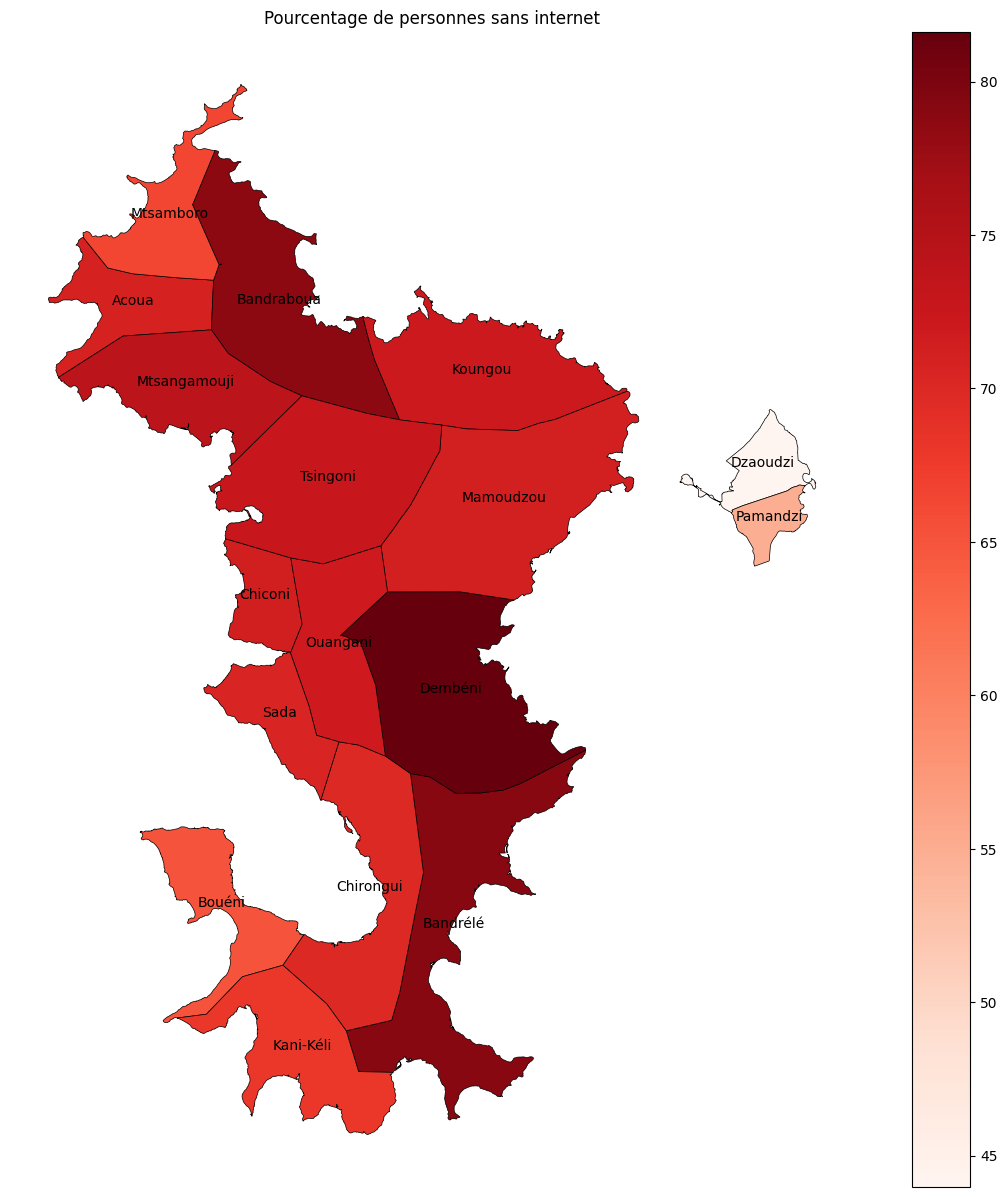

In [30]:
fig, ax = plt.subplots(figsize=[15,15])

ax.axis("off")
df_commune_Mayotte_geo.plot(ax=ax, column="Pc_sans_internet", cmap="Reds", edgecolor="black", linewidth=0.5, legend=True, aspect=1)
df_commune_Mayotte_geo.apply(lambda x: ax.annotate(text=x.commune, xy=x.geometry.centroid.coords[0], ha='center', color = "black"), axis=1)

ax.set_title("Pourcentage de personnes sans internet")

plt.show()

### Pourcentage de logements sans électricité

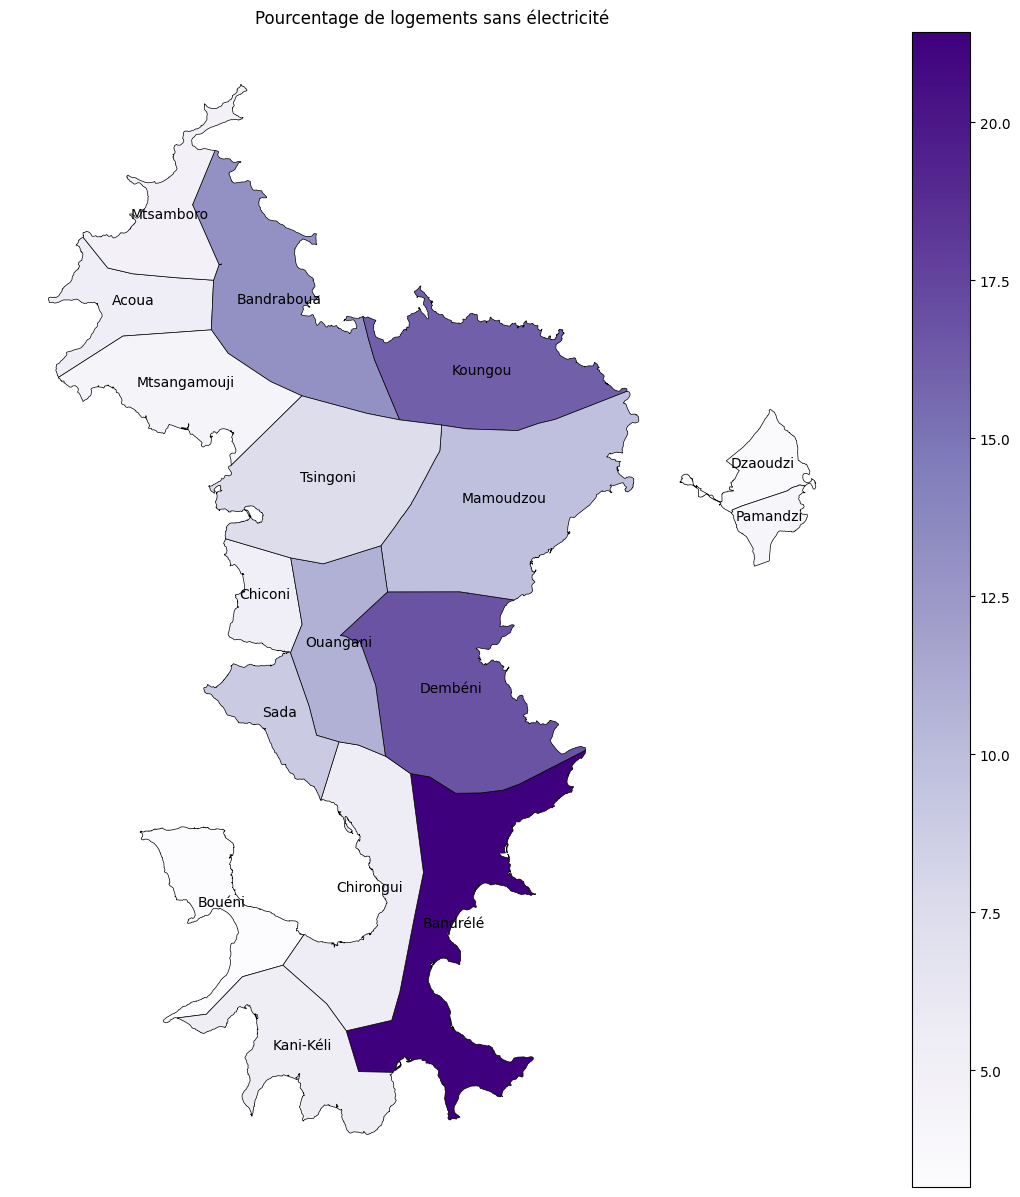

In [31]:
fig, ax = plt.subplots(figsize=[15,15])

ax.axis("off")
df_commune_Mayotte_geo.plot(ax=ax, column="Pc_sans_electricite", cmap="Purples", edgecolor="black", linewidth=0.5, legend=True, aspect=1)
df_commune_Mayotte_geo.apply(lambda x: ax.annotate(text=x.commune, xy=x.geometry.centroid.coords[0], ha='center', color = "black"), axis=1)

ax.set_title("Pourcentage de logements sans électricité")

plt.show()

### Pourcentage de logements sans confort sanitaire de base

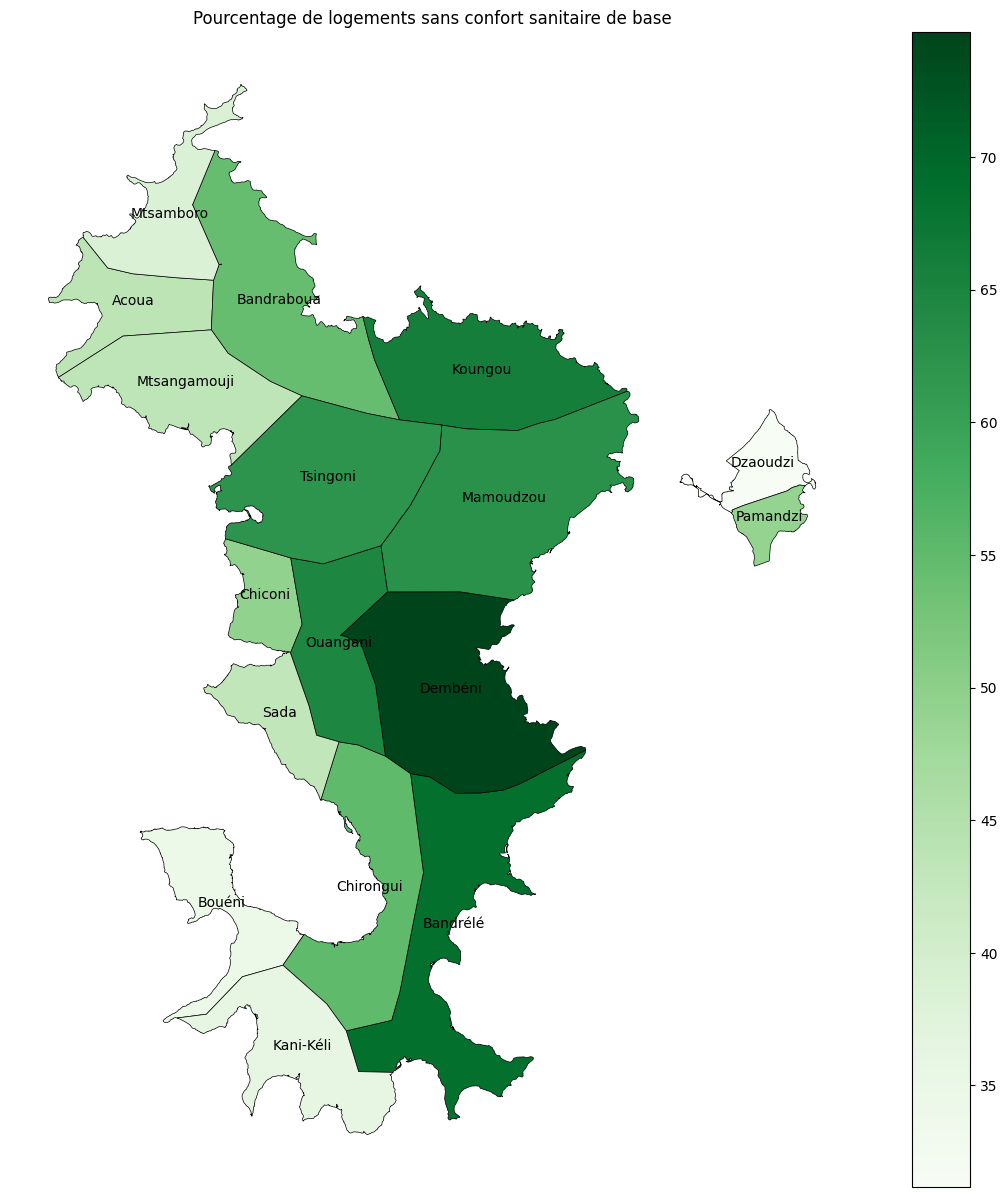

In [32]:
fig, ax = plt.subplots(figsize=[15,15])

ax.axis("off")
df_commune_Mayotte_geo.plot(ax=ax, column="Pc_absence_confort_sanitaire_de_base", cmap="Greens", edgecolor="black", linewidth=0.5, legend=True, aspect=1)
df_commune_Mayotte_geo.apply(lambda x: ax.annotate(text=x.commune, xy=x.geometry.centroid.coords[0], ha='center', color = "black"), axis=1)

ax.set_title("Pourcentage de logements sans confort sanitaire de base")

plt.show()

### Représentation géographique des clusters entre les communes

Avant de réaliser la représentation géographique des clusters entre les communes, il faut associé les classes pour chaque commune.

In [52]:
df_commune_Mayotte_geo["classe_kmean"] = pd.Series(kmeans.labels_).values
df_commune_Mayotte_geo

,commune,Code_commune,Village_de_residence,Code_village,Nb_enfants_ARS,Nb_15plus_sans_diplome,Pc_15plus_sans_diplome,Nb_15_34_sans_diplome,Pc_15_34_sans_diplome,Nb_allocataire_aide_logement,...,Pc_sans_internet,Nb_absence_confort_sanitaire_de_base,Pc_absence_confort_sanitaire_de_base,Nb_presence_confort_sanitaire_de_base,OBJECTID,codegeo,pop2007,pop2012,geometry,classe_kmean
0,Acoua,601,Mtsangadoua,97601002,883,1501.43,50.092249,363.19,27.058902,31,...,70.839236,294.424500,43.640744,360.575500,3,97601,4622,4714,"POLYGON ((505601.0145 8595853.9899, 506087.032...",1
1,Bandraboua,602,Bouyouni,97602005,1680,4684.90,62.099690,2133.97,49.683247,270,...,78.788070,395.910600,54.377194,241.890200,10,97602,9013,10132,"MULTIPOLYGON (((513951.0203 8593291.0415, 5139...",3
2,Bandrélé,603,Dapani,97603006,1160,3309.40,58.297955,1354.57,45.563161,86,...,78.994345,264.314667,68.737049,176.685217,9,97603,6838,7885,"POLYGON ((522536.2471 8574729.3797, 522446.507...",3
3,Bouéni,604,Majiméouni,97604007,980,1601.89,43.152272,349.17,21.356616,169,...,65.027167,82.806646,34.564474,155.479014,6,97604,5296,6402,"POLYGON ((509309.8963 8574165.5945, 509335.788...",1
4,Chiconi,605,Sohoa,97605002,1434,2459.21,50.161241,705.43,29.747657,89,...,71.338118,527.038500,49.275869,560.961500,14,97605,6412,7048,"POLYGON ((510834.7921 8584767.3165, 512595.683...",1
5,Chirongui,606,Mréréni,97606006,1166,2691.41,52.503331,966.43,36.996643,186,...,69.936038,190.380667,55.079508,175.119317,8,97606,6605,8047,"POLYGON ((515732.0237 8577176.0417, 516720.222...",1
6,Dembéni,607,Tsararano,97607005,1191,5181.79,61.360792,2444.42,49.659614,76,...,81.614297,537.195800,74.712647,196.804160,5,97607,10141,10923,"POLYGON ((519451.5427 8582814.494, 519758.6921...",3
7,Dzaoudzi,608,Labattoir,97608002,2106,5101.63,49.287730,1810.39,34.280742,290,...,43.978724,1309.460000,31.170198,805.540000,1,97608,15339,14311,"POLYGON ((531091.5332 8589298.7242, 531094.279...",0
8,Kani-Kéli,609,Mbouini,97609006,799,1593.77,46.894208,417.74,26.274774,65,...,68.067838,82.854683,36.130001,164.145283,7,97609,4527,4920,"POLYGON ((514564.4782 8567648.431, 514862.5654...",1
9,Koungou,610,Majicavo-Lamir,97610006,2520,9477.51,55.486790,4476.14,44.480903,340,...,72.055220,904.816500,66.088763,345.017167,11,97610,19831,26488,"POLYGON ((518056.4613 8593886.1004, 518092.149...",3


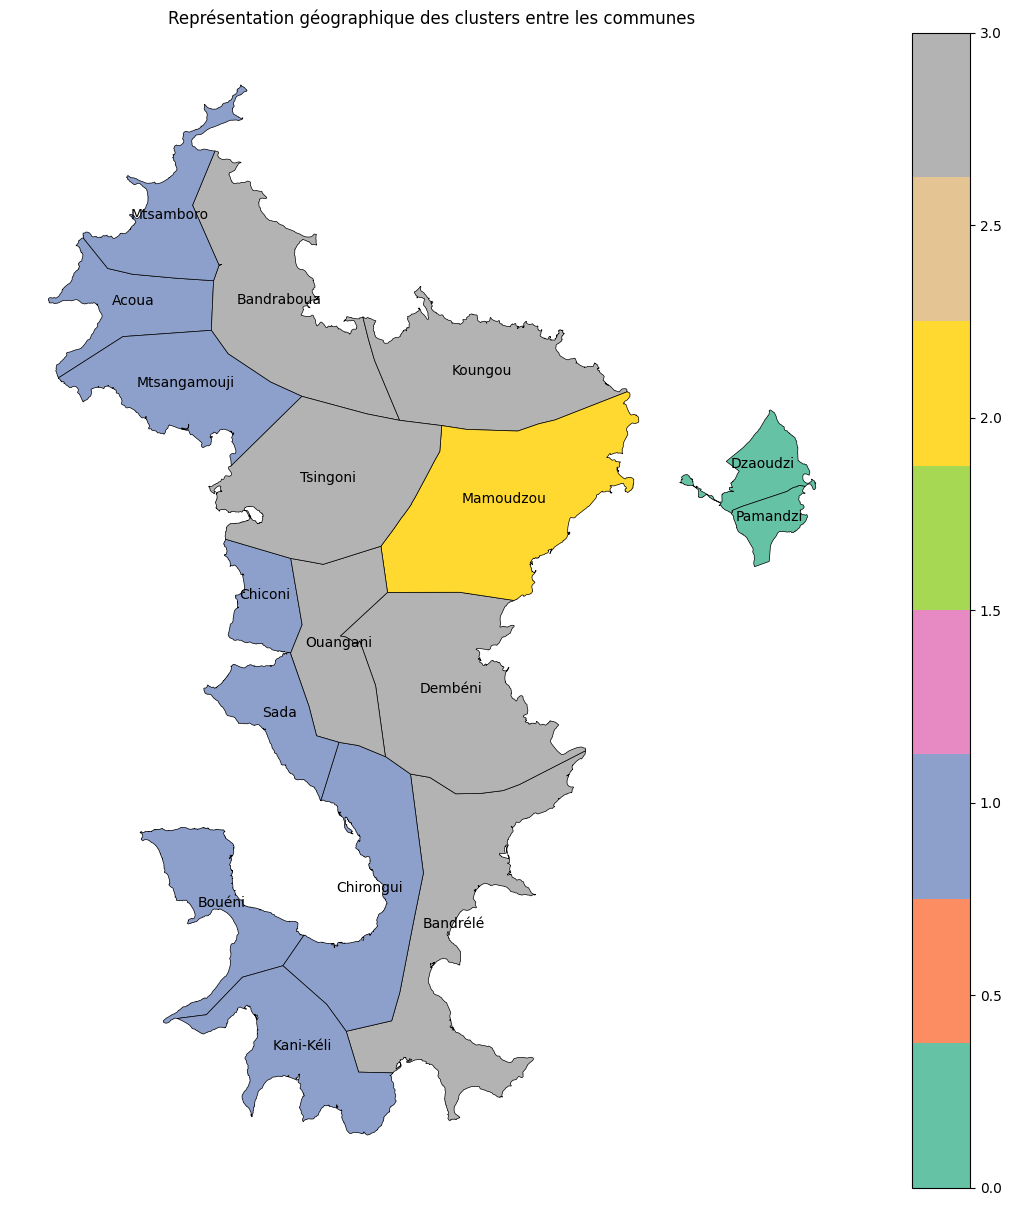

In [53]:
fig, ax = plt.subplots(figsize=[15,15])

ax.axis("off")
df_commune_Mayotte_geo.plot(ax=ax, column="classe_kmean", cmap="Set2", edgecolor="black", linewidth=0.5, legend=True, aspect=1)
df_commune_Mayotte_geo.apply(lambda x: ax.annotate(text=x.commune, xy=x.geometry.centroid.coords[0], ha='center', color = "black"), axis=1)

ax.set_title("Représentation géographique des clusters entre les communes")

plt.show()